<a href="https://colab.research.google.com/github/asceznyk/imadgen/blob/main/lifestyle_template_sd2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install colormap
!pip install easydev

  Preparing metadata (setup.py) ... done
  Created wheel for colormap: filename=colormap-1.0.4-py3-none-any.whl size=15637 sha256=26f489437b5499747403aa971d08a3732ba4e80b63800315dcbda7a51b1ca1ae
  Stored in directory: /root/.cache/pip/wheels/bb/25/18/6b007d77ac1220e0530efa2af14569bb803d77f140366fb313
Successfully built colormap
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for easydev: filename=easydev-0.12.1-py3-none-any.whl size=64218 sha256=8209595469d49adca6aef1a83c4135e041343178d2ef428bd3fae774ef6f1723
  Stored in directory: /root/.cache/pip/wheels/c5/a3/df/e8e19f6f1674c2b0574ccc1a156292b599709eaa4feeea0fcf
Successfully built easydev


In [ ]:
!pip install diffusers transformers xformers git+https://github.com/huggingface/accelerate.git

  Cloning https://github.com/huggingface/accelerate.git to /tmp/pip-req-build-vnivmgzf
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/accelerate.git /tmp/pip-req-build-vnivmgzf
  Resolved https://github.com/huggingface/accelerate.git to commit 180ef7c41576bc55cb1265fcdeb7da287e95c9b7
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 895.8/895.8 kB 13.6 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.1/109.1 MB 12.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 1.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 52.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install opencv-contrib-python
!pip install controlnet_aux

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.9/261.9 kB 4.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.3 MB/s eta 0:00:00


In [ ]:
from typing import List, Tuple, Dict, Union, Callable, TypedDict

from colormap import rgb2hex, hex2rgb

import os
import cv2
import random

import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

import torch

from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [ ]:
sd2_pipe = StableDiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-1", torch_dtype=torch.float16
)
sd2_pipe.scheduler = DPMSolverMultistepScheduler.from_config(sd2_pipe.scheduler.config)

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

In [ ]:
"""
dog_food
dog_toys
cat_food
cat_toys
shoes
shirts_tops
sculptures_statues
bed_sheets
desks
office_chairs
mattresses
perfume
skin_care
eyeglasses
backpacks
"""


class Colors(TypedDict):
    code:str
    word:str


class PromptDesigns(TypedDict):
    category:str
    design:List[str]


class CategoryMaps(TypedDict):
    category:str
    image:Image.Image


colors: Colors = {
    "#ffdaa6;#c3b397": "gradient-brown",
    "#e30613": "red",
    "#3f62ae": "royal blue",
    "#803300": "cinnamon",
    "#b3ffff": "sky blue",
    "#e619ff": "purple",
    "#ff8000": "orange"
}

"""
"perfume": [
    f"a small circular # colored podium infront of a # wall inside a room"
],
"skin_care": [
    f"a small circular # colored podium placed in the center of a # wall inside a room"
],
"eyeglasses": [
    f"a small circular # colored podium infront of a # wall inside a room"
],
"sculptures_statues": [
    f"a small circular # podium placed in the center of a # wall inside a room"
]
"""


prompt_cats: PromptDesigns = {
    "desks": [
        f"A cozy and inviting living room with , soft natural lighting, an empty center, modern decor with a #, #, and # color scheme (don't add a $)"
    ],
    "office_chairs": [
        f"A cozy and inviting living room bathed in soft natural light. The center of the room is empty. The room is decorated in a modern style, with colors of #, #, and # complementing each other perfectly"
    ]
}

device = "cuda"

In [ ]:
def make_category_prompt(category:str, palette:List[str], j:int=0):
    prompt_cat = []
    colors_list = [colors[code] for code in palette]
    sample_prompt = prompt_cats[category][j]
    prompt_split = sample_prompt.split('#')

    n = len([c for c in sample_prompt if c == '#'])
    m = len(colors_list)
    if n > m: colors_list = [colors_list[random.randint(0, m-1)] for _ in range(n)]

    for i, color in enumerate(colors_list): prompt_cat.append(''.join([prompt_split[i], color]))
    prompt_cat.append(prompt_split[-1])
    return ''.join(prompt_cat).replace('$', category)


def image_grid(imgs:List[np.array], rows:int, cols:int) -> Image.Image:
    assert len(imgs) == rows * cols

    w, h = imgs[0].size
    grid = Image.new("RGB", size=(cols * w, rows * h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i % cols * w, i // cols * h))
    return grid


def map_gen_images(
    cat_maps:CategoryMaps,
    palette:List[str],
    gen_pipe:Callable,
    gen_kwargs:Dict={
        "guidance_scale":10,
        "num_inference_steps":20,
        "num_images_per_prompt":4
    }
) -> CategoryMaps:
    gen_imgs:CategoryMaps = {}
    num_images = gen_kwargs['num_images_per_prompt']
    assert num_images % 4 == 0, "num_images must be divisble by 4"

    for cat, img in cat_maps.items():
        prompt = make_category_prompt(category=cat, palette=palette)
        print(f"input prompt: {prompt}")
        output = gen_pipe(
            prompt,
            img,
            negative_prompt="monochrome, lowres, bad anatomy, worst quality, low quality, wooden, gradient, greek sculpture, floral design, face, text",
            **gen_kwargs
        )
        gen_imgs[cat] = image_grid(output.images, num_images // 4, 4)
    return gen_imgs


def sd2_gen_images(
    palette:List[str],
    detail_prompt:str='ambient lighting, extremely detailed, photorealistic',
    negative_prompt:str='',
    gen_kwargs:Dict={
        "guidance_scale":10,
        "num_inference_steps":20,
        "num_images_per_prompt":4
    },
) -> CategoryMaps:
    gen_imgs:CategoryMaps = {}
    num_images:int = gen_kwargs['num_images_per_prompt']
    assert num_images % 4 == 0, "num_images must be divisble by 4"

    for cat, _ in prompt_cats.items():
        cat_prompt = make_category_prompt(category=cat, palette=palette)
        input_prompt = f"{cat_prompt}, {detail_prompt}"
        print(f"input prompt: {input_prompt}")
        output = sd2_pipe(
            input_prompt,
            negative_prompt="monochrome, lowres, bad anatomy, worst quality, low quality, wooden, gradient, greek sculpture, floral design, face, text, table",
            **gen_kwargs
        )
        gen_imgs[cat] = image_grid(output.images, num_images // 4, 4)
    return gen_imgs

In [ ]:
client_palette1 = ['#ffdaa6;#c3b397', "#e30613", "#3f62ae"]
client_palette2 = ['#803300', '#b3ffff', '#ff8000']

In [ ]:
colors

{'#ffdaa6;#c3b397': 'gradient-brown',
 '#e30613': 'red',
 '#3f62ae': 'royal blue',
 '#803300': 'cinnamon',
 '#b3ffff': 'sky blue',
 '#e619ff': 'purple',
 '#ff8000': 'orange'}

In [ ]:
make_category_prompt(category='desks', palette=client_palette2)

'A cozy and inviting living room features soft natural light, an empty center, modern decor with a cinnamon, sky blue, and orange color scheme.'

In [ ]:
sd2_pipe.to(device)
imgs_cat_palette_sd2 = []
for palette in [client_palette1, client_palette2]:
    gen_imgs_sd2 = sd2_gen_images(palette, gen_kwargs={
        "guidance_scale":10,
        "num_inference_steps":20,
        "num_images_per_prompt":4
    })
    imgs_cat_palette_sd2.append(gen_imgs_sd2)

input prompt: A cozy and inviting living room without a table, soft natural lighting, an empty center, modern decor with a gradient-brown, red, and royal blue color scheme, ambient lighting, extremely detailed, photorealistic


  0%|          | 0/20 [00:00<?, ?it/s]

input prompt: A cozy and inviting living room bathed in soft natural light. The center of the room is empty. The room is decorated in a modern style, with colors of gradient-brown, red, and royal blue complementing each other perfectly, ambient lighting, extremely detailed, photorealistic


  0%|          | 0/20 [00:00<?, ?it/s]

input prompt: A cozy and inviting living room without a table, soft natural lighting, an empty center, modern decor with a cinnamon, sky blue, and orange color scheme, ambient lighting, extremely detailed, photorealistic


  0%|          | 0/20 [00:00<?, ?it/s]

input prompt: A cozy and inviting living room bathed in soft natural light. The center of the room is empty. The room is decorated in a modern style, with colors of cinnamon, sky blue, and orange complementing each other perfectly, ambient lighting, extremely detailed, photorealistic


  0%|          | 0/20 [00:00<?, ?it/s]

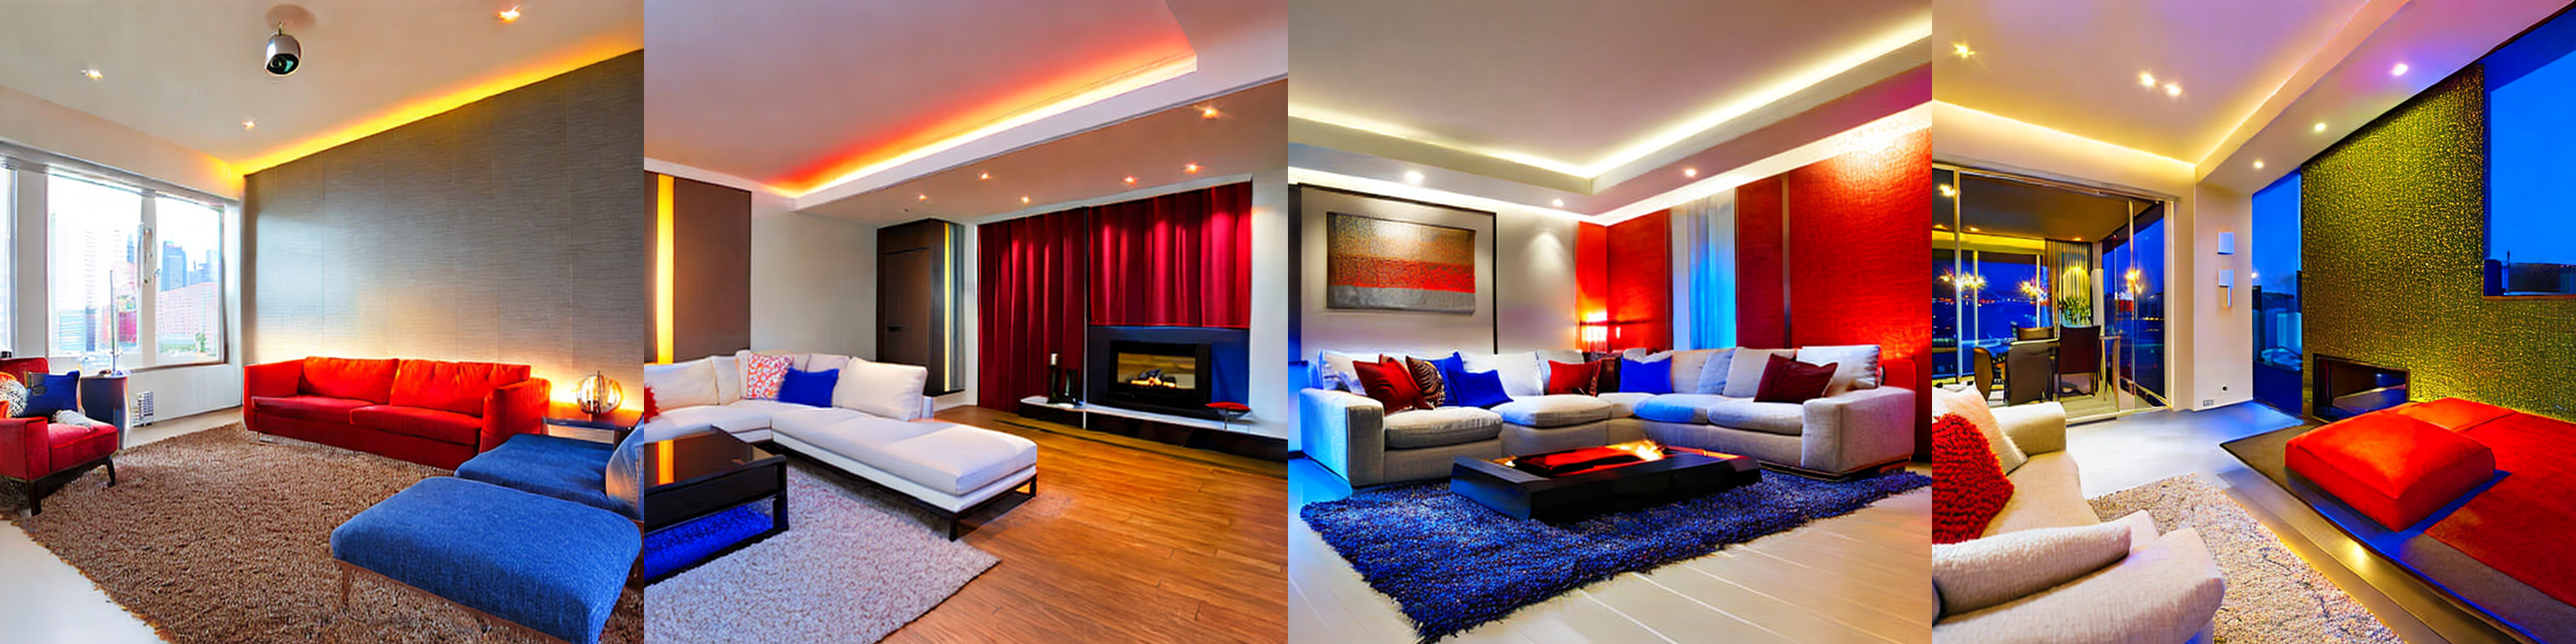

In [ ]:
imgs_cat_palette_sd2[0]['desks']

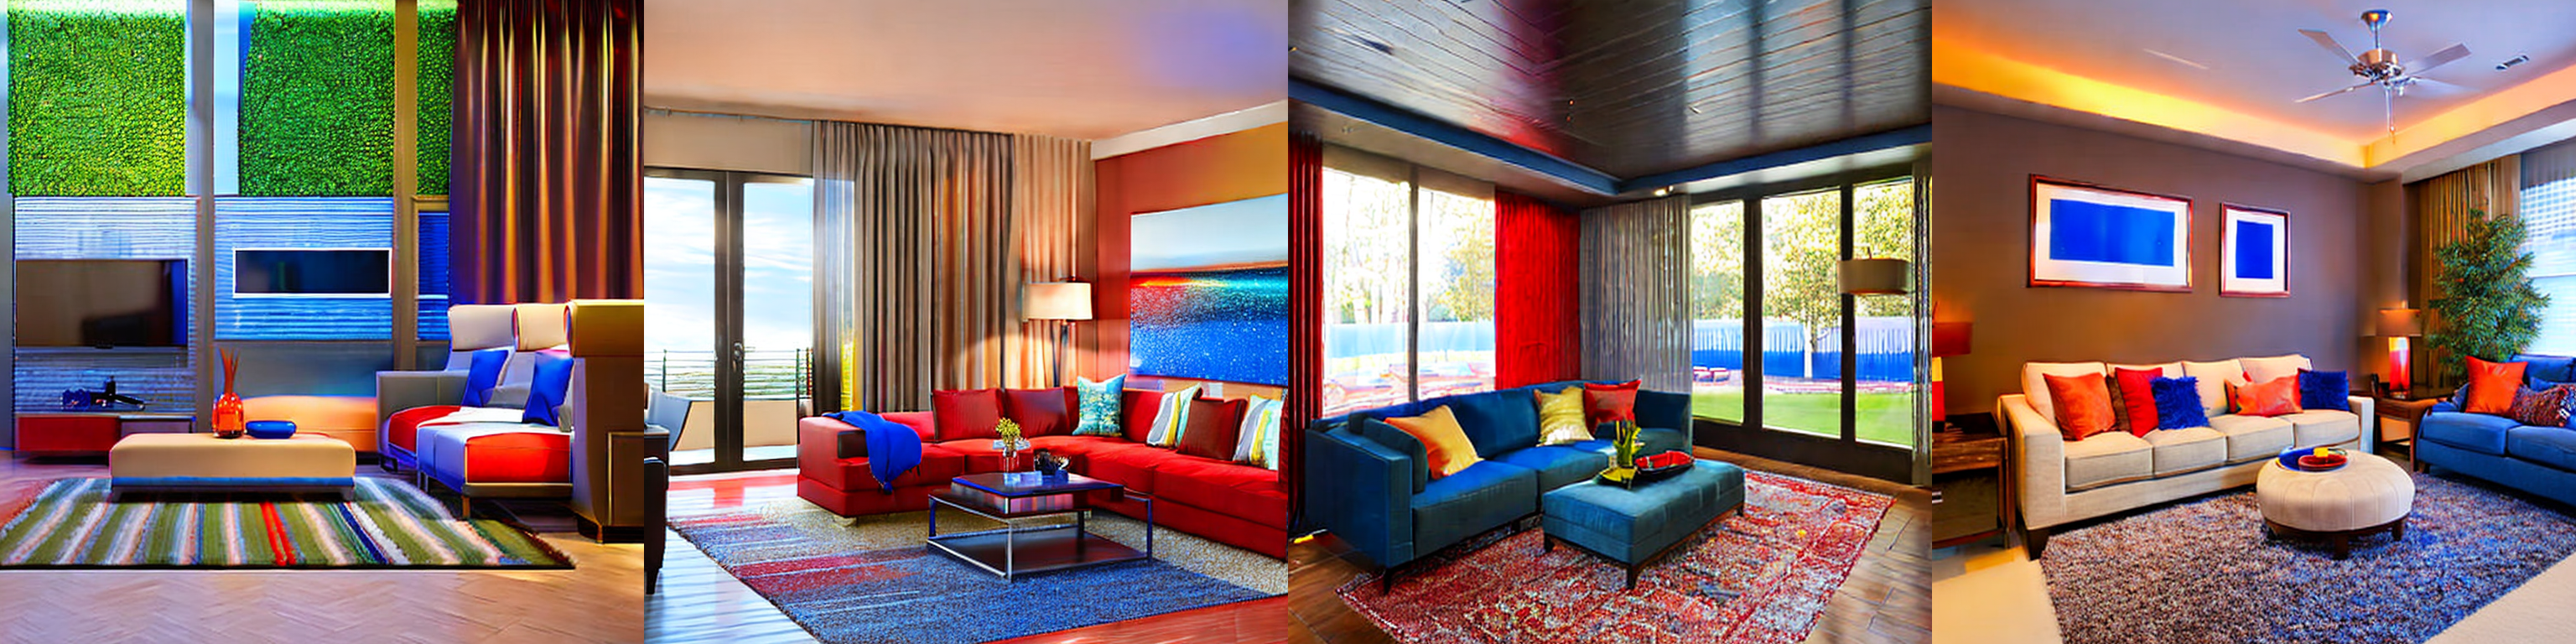

In [ ]:
imgs_cat_palette_sd2[0]['office_chairs']

In [ ]:
rm -r *

In [ ]:
save_dir = 'ai_lifestyle_imgs2'
os.makedirs(save_dir, exist_ok=True)
client = ['punjabkings', 'monopoly']
for i in range(len(imgs_cat_palette_sd2)):
    for cat, img in imgs_cat_palette_sd2[i].items():
        os.makedirs(f'{save_dir}/{cat}', exist_ok=True)
        img.save(f'{save_dir}/{cat}/ai_gen_{client[i]}_bg.png')

In [ ]:
!zip -r ai_lifestyle.zip ai_lifestyle_imgs2/

  adding: ai_lifestyle_imgs/ (stored 0%)
  adding: ai_lifestyle_imgs/desks/ (stored 0%)
  adding: ai_lifestyle_imgs/desks/ai_gen_punjabkings_bg.png (deflated 0%)
  adding: ai_lifestyle_imgs/desks/ai_gen_monopoly_bg.png (deflated 0%)
  adding: ai_lifestyle_imgs/office_chairs/ (stored 0%)
  adding: ai_lifestyle_imgs/office_chairs/ai_gen_punjabkings_bg.png (deflated 0%)
  adding: ai_lifestyle_imgs/office_chairs/ai_gen_monopoly_bg.png (deflated 0%)
